<a href="https://colab.research.google.com/github/i-pinglu/python-4001/blob/main/hw5_%E5%91%82%E5%84%80%E5%B9%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

evaluation MSE: 0.013446201443205819


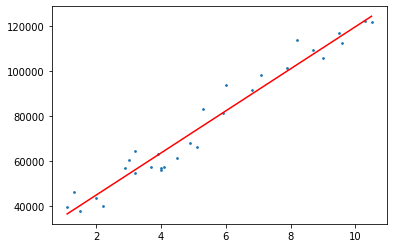

In [2]:
#讀資料
data = pd.read_csv("https://raw.githubusercontent.com/i-pinglu/python-4001/main/Salary_Data.csv")
X = np.array(data["YearsExperience"]).reshape(-1,1)
Y = np.array(data["Salary"]).reshape(-1,1)
#分割資料
train_x, test_x, train_y, test_y  = train_test_split(X, Y, test_size=0.2, random_state=10)
#進行標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()
#fit_transform:fit找到train(部分資料)的整體統計特性之指標(平均值、標準差、最大最小值)後，transform對partData進行標準化
sc_train_x = scaler_x.fit_transform(train_x)
sc_train_y = scaler_y.fit_transform(train_y)
#建立模型
regression = LinearRegression()
#訓練
regression.fit(sc_train_x, sc_train_y)
#評估，transform:對test(剩餘資料)使用相同的平均值、標準差、最大/最小值等指標進行轉換，從而保證部分資料、剩餘資料是以同樣的統計指標下去作標準化等轉換之資料前處理
sc_test_x = scaler_x.transform(test_x)
sc_test_y = scaler_y.transform(test_y)
#預測test的薪水
y_p = regression.predict(sc_test_x)
#計算loss(真實答案，預測答案)
print(f"evaluation MSE: {mean_squared_error(sc_test_y, y_p)}")
#對整個原始資料進行預測
Y_p = regression.predict(scaler_x.transform(X))
#將標準化轉回來
Y_inv_p = scaler_y.inverse_transform(Y_p)
#畫圖
plt.scatter(X, Y, s =3)
plt.plot(X, Y_inv_p, color="red")
plt.show()